<a href="https://colab.research.google.com/github/Malak-Khasawneh/NetflixDataset/blob/main/Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*put the data in a dataframe and print the first few values*

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Copy of netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Data Cleaning**

**show and change the data type of each column **

In [4]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [5]:
df[['show_id','title','type','director','cast','country','rating','duration','listed_in','description']]=df[['show_id','title','type','director','cast','country','rating','duration','listed_in','description']].astype('string')
df[['date_added']]=df[['date_added']].astype('datetime64[ns]')
df['release_year']=pd.to_numeric(df['release_year'],errors='coerce')
df.dtypes

,0
show_id,string[python]
type,string[python]
title,string[python]
director,string[python]
cast,string[python]
country,string[python]
date_added,datetime64[ns]
release_year,int64
rating,string[python]
duration,string[python]


*look for duplicates and delete them*

In [6]:
duplicates=df[df.duplicated()]
print(duplicates)
#if there were any duplicates that how we drop them:
#df.drop_duplicates(inplace=True)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


*There are no duplicates in the data*

**show number of null values in each column **

In [7]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')


**Calculate the mode (The most frequent value) for each of the selected columns then fill the null values with that value **


In [9]:
mode_=df[['cast','rating']].mode().iloc[0]
#iloc[0] to extract the first row!
df[['cast','rating']]=df[['cast','rating']].fillna(mode_)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,0
duration,0


*calculate the median date_added and fill the null values with it*

In [51]:
mode_date = df['date_added'].mode()
df['date_added'] = df['date_added'].fillna(mode_date)

In [11]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,David Attenborough,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   string        
 1   type          8807 non-null   string        
 2   title         8807 non-null   string        
 3   director      8807 non-null   string        
 4   cast          8807 non-null   string        
 5   country       8807 non-null   string        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   string        
 9   duration      8807 non-null   string        
 10  listed_in     8807 non-null   string        
 11  description   8807 non-null   string        
dtypes: datetime64[ns](1), int64(1), string(10)
memory usage: 825.8 KB


**Exploring the data**

*lets find the most released type in general*

In [13]:
freq_type=df['type'].mode()[0]
print(freq_type)

Movie


*lets find the most watched Genre!* *After we separate the genres by the comma*

In [14]:
all_genres = df['listed_in'].str.split(',').explode()
freq_genre = all_genres.mode()[0]
print(freq_genre)

 International Movies


*What about the top 5 trending genres!*

In [15]:
all_genres = df['listed_in'].str.split(',').explode()
genre_count=all_genres.value_counts()
top_5=genre_count.head(5)
print(top_5)

listed_in
 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: count, dtype: int64


*who's the director with the highest number of movies/series?*

*we exclude the value 'Unknown' and show the name of the first known most frequent director*

In [16]:
movie_directors=df[df['type']=='Movie']['director'].str.split(',').explode()
movie_count =movie_directors.value_counts()
freq_movies_director = movie_count[movie_count.index != 'Unknown'].idxmax()
print('Movies:',freq_movies_director)
series_directors=df[df['type']=='TV Show']['director'].str.split(',').explode()
series_count =series_directors.value_counts()
freq_series_director = series_count[series_count.index != 'Unknown'].idxmax()
print('TV Shows:',freq_series_director)


Movies: Rajiv Chilaka
TV Shows: Ken Burns


*lets see what country produces movies/series the most*

In [17]:
movie_countries = df[df['type'] == 'Movie']['country'].str.split(',').explode()
countryM_count = movie_countries.value_counts()
freq_movies_country = countryM_count[countryM_count.index != 'Unknown'].idxmax()
print('Movies:',freq_movies_country)
series_countries = df[df['type'] == 'TV Show']['country'].str.split(',').explode()
countryS_count = series_countries.value_counts()
freq_series_country = countryS_count[countryS_count.index != 'Unknown'].idxmax()
print('TV shows:',freq_series_country)

Movies: United States
TV shows: United States


*The number of Movies/ TV Shows added to Netflix each year!*

In [18]:
movies_data = df[df['type'] == 'Movie']
# Extract the year
movies_by_year = movies_data['date_added'].dt.year.value_counts().sort_index()
movies_by_year


,count
date_added,
2008,1
2009,2
2010,1
2011,13
2012,3
2013,6
2014,19
2015,56
2016,253


In [19]:
series_data=df[df['type'] == 'TV Show']
series_by_year = series_data['date_added'].dt.year.value_counts().sort_index()
series_by_year

,count
date_added,
2008,1
2013,5
2014,5
2015,26
2016,176
2017,349
2018,412
2019,602
2020,595


*The Average Duration of the Movies(minutes) / TV Shows(seasons).*

In [20]:
def extract_duration(row):
    if row['type'] == 'Movie':
        return pd.to_numeric(row['duration'].replace(' min', ''), errors='coerce')
    elif row['type'] == 'TV Show':
        return pd.to_numeric(row['duration'].replace(' Season', '').replace('s', '').replace(' Seasons', ''), errors='coerce')

df['Duration'] = df.apply(extract_duration, axis=1)
avg_duration = df.groupby('type')['Duration'].median()#less sensitive to outliers
avg_duration_mean = df.groupby('type')['Duration'].mean()
avg_duration_mode = df.groupby('type')['Duration'].apply(lambda x: x.mode().iloc[0])

print('median:\n',avg_duration)
print('mean:\n',avg_duration_mean)
print('mode:\n',avg_duration_mode)

median:
 type
Movie      98.0
TV Show     1.0
Name: Duration, dtype: float64
mean:
 type
Movie      99.577187
TV Show     1.764948
Name: Duration, dtype: float64
mode:
 type
Movie      90.0
TV Show     1.0
Name: Duration, dtype: float64


*it is best to use Median for Movies cause it is less sensitive to outliers and use mode for TV Shows to find the most frequent value.*

*lets see the name and duration of the shortest and longest Movies*

In [21]:
movies_data = df[df['type'] == 'Movie']
movies_data['Duration'] = movies_data['duration'].str.extract('(\d+)').astype(float)

longest_movie = movies_data.loc[movies_data['Duration'].idxmax()]
shortest_movie = movies_data.loc[movies_data['Duration'].idxmin()]

print("Longest Movie:")
print(longest_movie[['title', 'Duration']])

print("\nShortest Movie:")
print(shortest_movie[['title', 'Duration']])

Longest Movie:
title       Black Mirror: Bandersnatch
Duration                         312.0
Name: 4253, dtype: object

Shortest Movie:
title       Silent
Duration       3.0
Name: 3777, dtype: object


<ipython-input-21-a8099bdda415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['Duration'] = movies_data['duration'].str.extract('(\d+)').astype(float)


In [52]:
#we create new columns that have all the genres and countries

new_df = df.assign(Genre=df['listed_in'].str.split(','),
                   Director=df['director'].str.split(','),
                   Country=df['country'].str.split(',')).explode('Genre').explode('Country').explode('Director')
new_df['Genre'] = new_df['Genre'].str.strip()
new_df['Country'] = new_df['Country'].str.strip()
new_df['Director'] = new_df['Director'].str.strip()

new_df.head(6)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Duration,Genre,Director,Country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,International TV Shows,Unknown,South Africa
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,TV Dramas,Unknown,South Africa
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,TV Mysteries,Unknown,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Crime TV Shows,Julien Leclercq,Unknown
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,International TV Shows,Julien Leclercq,Unknown


In [23]:
#create a data frame that groups the data by only three columns : Release year, Genre and Country
YCG_DF = new_df.groupby(['release_year', 'Country', 'Genre']).size().reset_index(name='Count')
YCG_DF.head(9)


,release_year,Country,Genre,Count
0,1925,Unknown,TV Shows,1
1,1942,United States,Classic Movies,2
2,1942,United States,Documentaries,2
3,1943,United States,Classic Movies,1
4,1943,United States,Documentaries,4
5,1944,United Kingdom,Classic Movies,5
6,1944,United Kingdom,Documentaries,5
7,1944,United States,Classic Movies,7
8,1944,United States,Documentaries,7


**Pivoting is a neat process that transforms a Data Frame into a new one by converting selected columns into new columns based on their values, where the unique values of a particular column become the column headers, and the corresponding values in another column fill in the new columns. **

*This technique allow us to make better sense of our data and compare different datasets more efficiently.*


In [24]:
#reshape the data so that each unique value in the country column becomes a column header and the rows are indexed by release year
#Heatmaps dont deal with categorical data!
YCG_DF_pivot=YCG_DF.pivot_table(values='Count', index='release_year', columns='Country', aggfunc='sum', fill_value=0)
YCG_DF_pivot.head(4)

Country,,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Unknown,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
release_year,,,,,,,,,,,,,,,,,,,,,
1925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1942,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
1943,0,0,0,0,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,10,14,0,0,0,0,0,0,0


**Visualizations**

*plot of the distribution of Movies vs. TV Shows*

<ipython-input-26-8e0f834668cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=['darkred', 'black'])


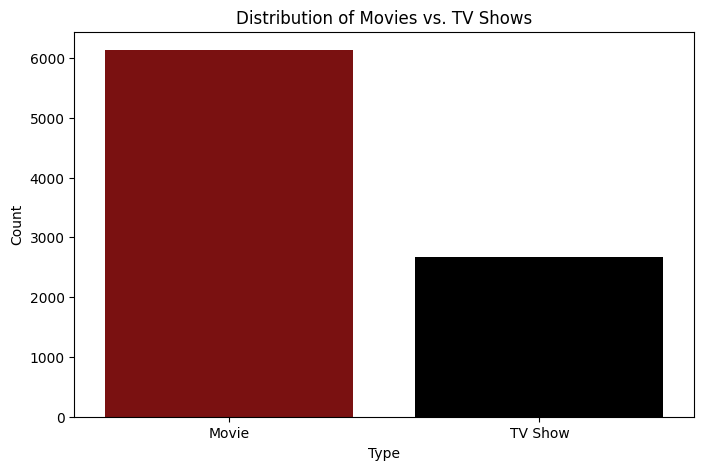

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette=['darkred', 'black'])
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

*Apparently the number of movies released is higher than the number of TV Shows!*

*lets see the number of shows/movies for each genre in the top 10*

<ipython-input-28-c65a1d159ebc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index, palette='Reds_r')  # Reds_r for reversed shades of red


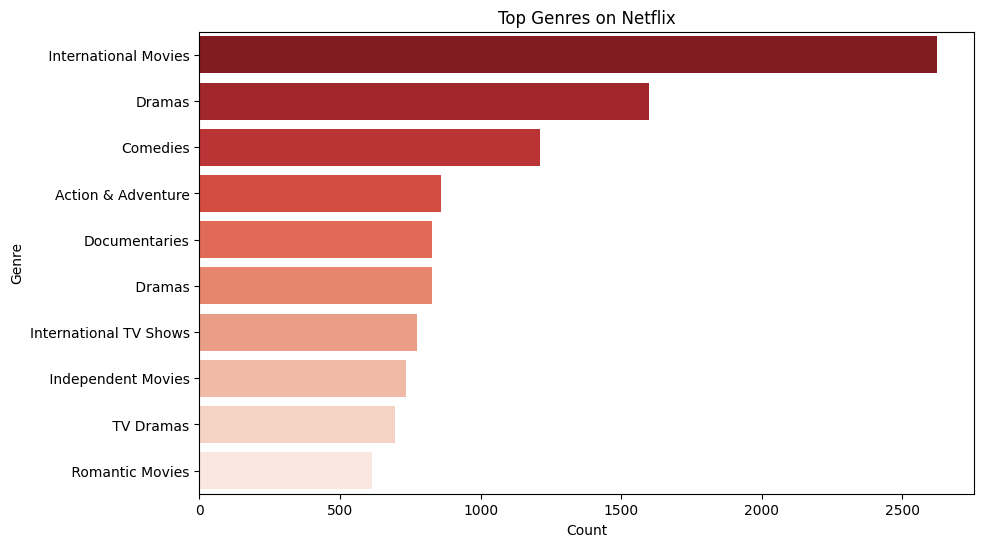

In [28]:
genre_data = df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_data.values, y=genre_data.index, palette='Reds_r')  # Reds_r for reversed shades of red
plt.title('Top Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


*Mainly International movies is the most released genre, and in the second place comes Drama!*

*lets see the number of shows/movies for the last 10 genres in the bottom*

<ipython-input-53-90ddd4681e77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index,palette='Reds_r')


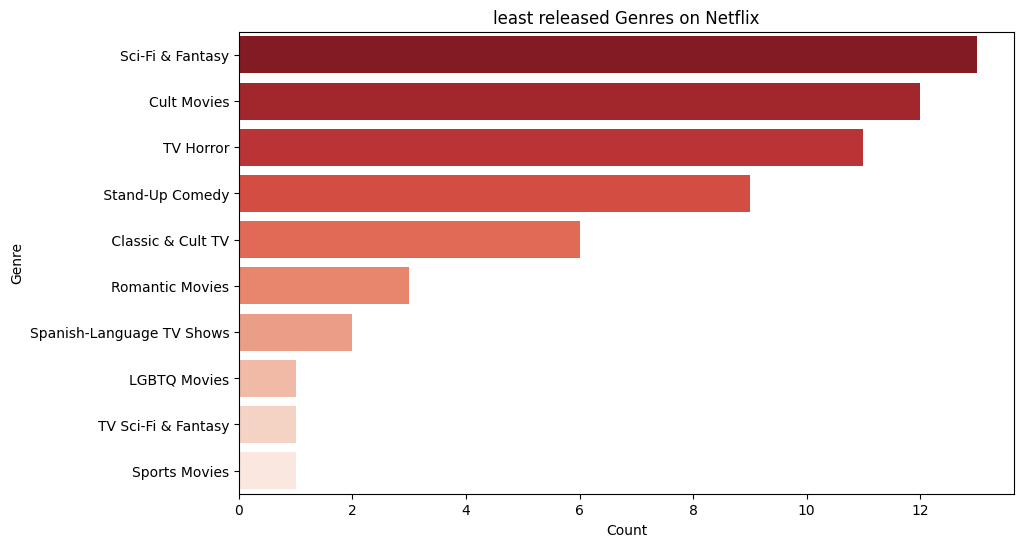

In [53]:
genre_data = df['listed_in'].str.split(',', expand=True).stack().value_counts().tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_data.values, y=genre_data.index,palette='Reds_r')
plt.title('least released Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

*We notice that LGBTQ, SCi-fi and Sports movies are the least released genres of movies*

*Lets see who are the top 5 Director*

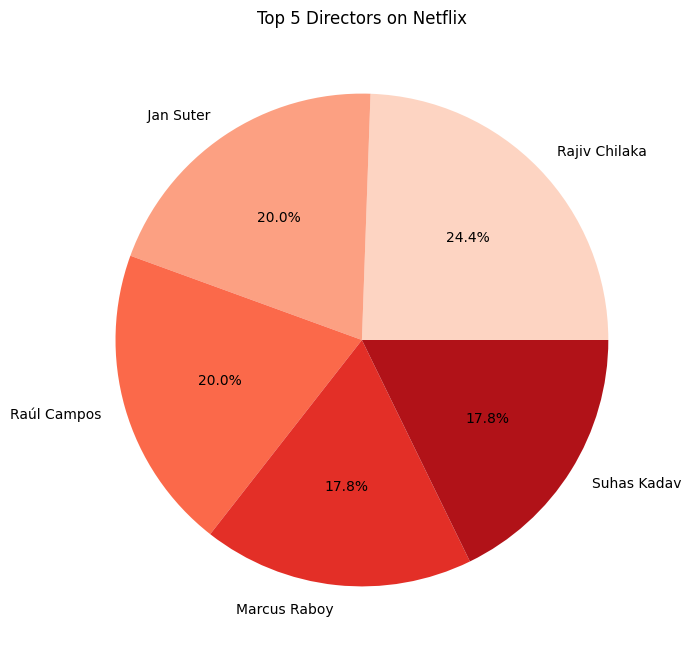

In [31]:
directors_data = df['director'].str.split(',', expand=True).stack().value_counts()
directors_data = directors_data[directors_data.index != 'Unknown'].head(5)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Reds', len(directors_data))
plt.pie(directors_data.values, labels=directors_data.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Directors on Netflix')
plt.show()


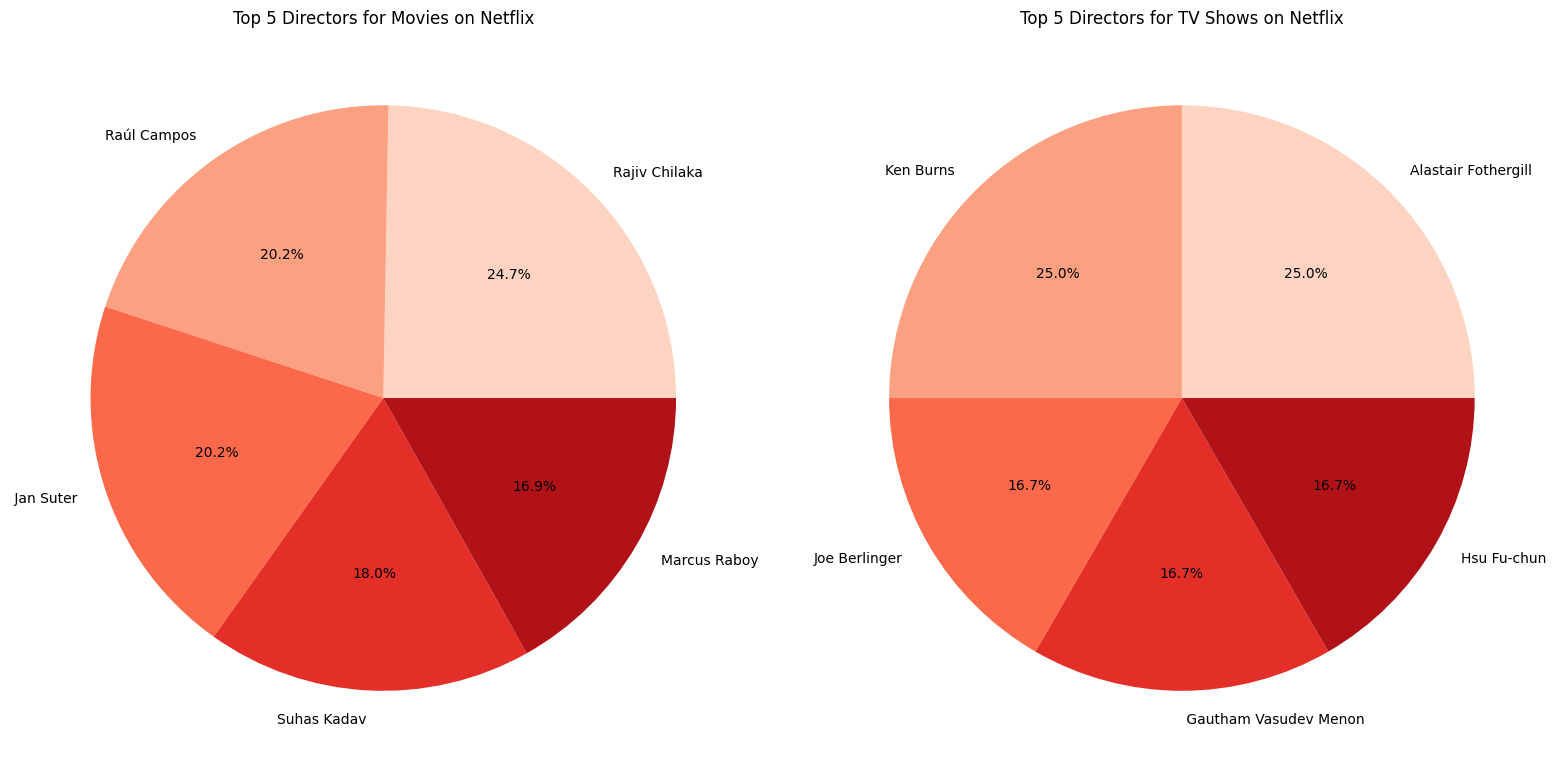

In [32]:
movie_directors = df[df['type'] == 'Movie']['director'].str.split(',', expand=True).stack().value_counts()
movie_directors = movie_directors[movie_directors.index != 'Unknown'].head(5)

tv_directors = df[df['type'] == 'TV Show']['director'].str.split(',', expand=True).stack().value_counts()
tv_directors = tv_directors[tv_directors.index != 'Unknown'].head(5)

# Plot for Movies
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)  # First subplot
colors = sns.color_palette('Reds', len(movie_directors))
plt.pie(movie_directors.values, labels=movie_directors.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Directors for Movies on Netflix')

# Plot for TV Shows
plt.subplot(1, 2, 2)  # Second subplot
colors = sns.color_palette('Reds', len(tv_directors))
plt.pie(tv_directors.values, labels=tv_directors.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Directors for TV Shows on Netflix')

plt.tight_layout()
plt.show()




*Rajiv Chilaka is the Director of the highest number of movies/TV Shows.*

*The top 10 Content Producing Countries*

<ipython-input-34-f0cdb0cfc7f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_data.values, y=country_data.index, palette='Reds_r')


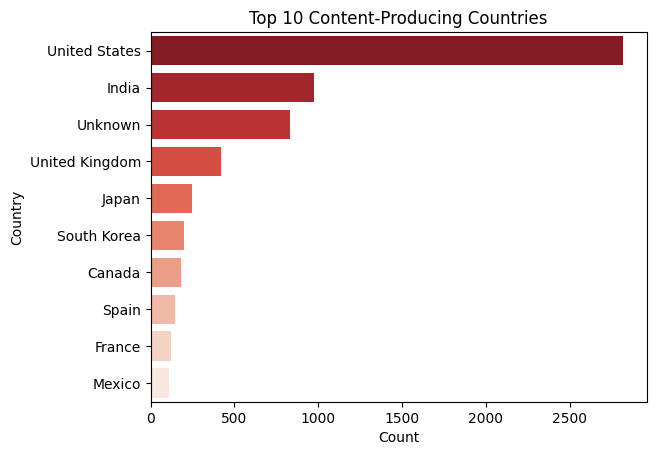

In [34]:
country_data = df['country'].value_counts().head(10)
sns.barplot(x=country_data.values, y=country_data.index, palette='Reds_r')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

*United States is the Number One country for Content Producing!*

*lets see the distribution of content added to Netflix over time(Years).*

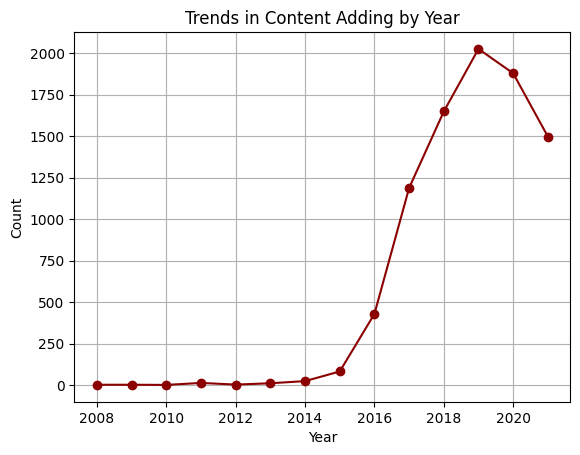

In [35]:
content_by_year = df['date_added'].dt.year.value_counts().sort_index()
content_by_year.plot(kind='line', marker='o',color='darkred')
plt.title('Trends in Content Adding by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()
plt.show()

*Almost around 2019 the most releases on Netflix were made!*

*A plot that shows the number of releases in each of the top 15 years*

In [36]:
movies_by_release_year = movies_data['release_year'].value_counts().sort_index()
movies_by_release_year
top_10_years = movies_by_release_year.nlargest(10)
top_10_years

,count
release_year,
2017,767
2018,767
2016,658
2019,633
2020,517
2015,398
2021,277
2014,264
2013,225


In [37]:
series_by_release_year = series_data['release_year'].value_counts().sort_index()
series_by_release_year
top_10_years = series_by_release_year.nlargest(10)
top_10_years

,count
release_year,
2020,436
2019,397
2018,380
2021,315
2017,265
2016,244
2015,162
2014,88
2012,64


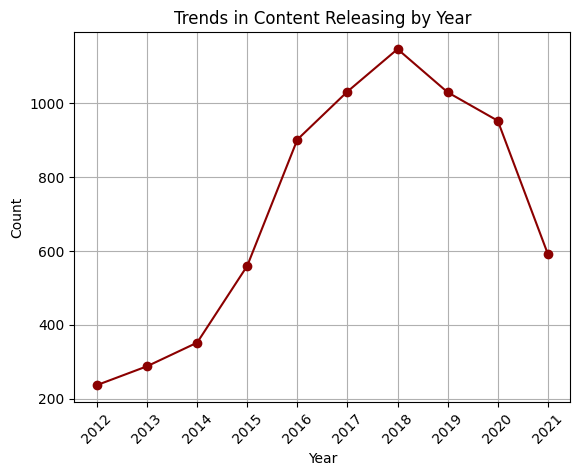

In [38]:
content_by_release_year = df['release_year'].value_counts().nlargest(10).sort_index()
content_by_release_year.plot(kind='line', marker='o',color='darkred')
plt.title('Trends in Content Releasing by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(ticks=content_by_release_year.index, rotation=45)
plt.grid()
plt.show()

<ipython-input-39-1fd68160b98a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year', data=filtered_df, palette='Reds_r')


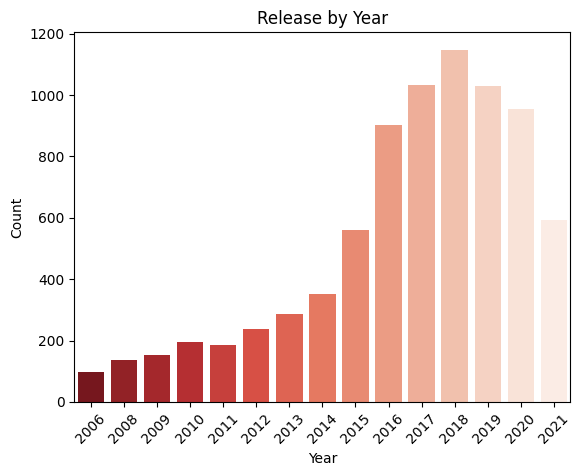

In [39]:
top_15_years = df['release_year'].value_counts().nlargest(15).index
filtered_df = df[df['release_year'].isin(top_15_years)]
sns.countplot(x='release_year', data=filtered_df, palette='Reds_r')
plt.title('Release by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.show()

***We can 100% say that 2018 was the year with the most content releases!***

*check out the rating distribution*

<ipython-input-40-8d0c57544183>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rating_data.values, x=rating_data.index, palette='Reds_r')


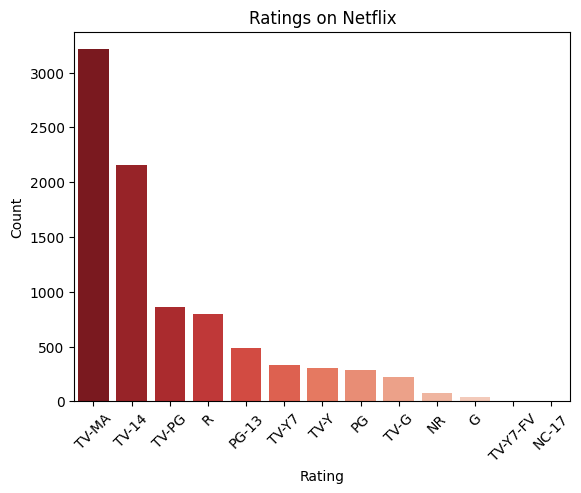

In [40]:
rating_data = df['rating'].value_counts().head(13)
sns.barplot(y=rating_data.values, x=rating_data.index, palette='Reds_r')
plt.title('Ratings on Netflix')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.xticks(rotation=45, fontsize=10)
plt.show()

*lets plot the relationship that explains the change of the number of Netflix movies/TV Shows released each year in each country*

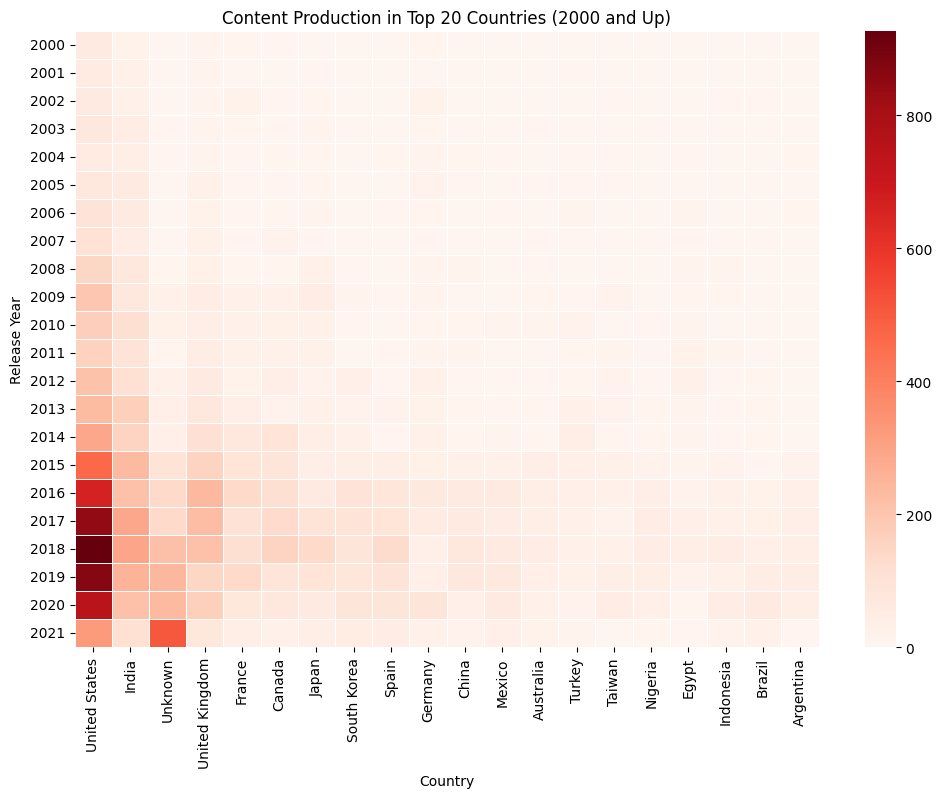

In [41]:
filtered_data = YCG_DF_pivot.loc[YCG_DF_pivot.index >= 2000]
top_20_countries = filtered_data.sum(axis=0).nlargest(20).index
filtered_data_top_20 = filtered_data[top_20_countries]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_top_20, cbar=True, linewidths=0.5, cmap='Reds')
plt.xlabel('Country')
plt.ylabel('Release Year')
plt.title('Content Production in Top 20 Countries (2000 and Up)')
plt.show()

*A dark color in a Heatmap tells that there are high number of titles released by a country at this specific year.*
***As We Can see, The releasing of movie/TV Shows titles in the United states started increasing around 2008, and it reached its peak around 2018!***

*lets make it more clear and take only USA for example*

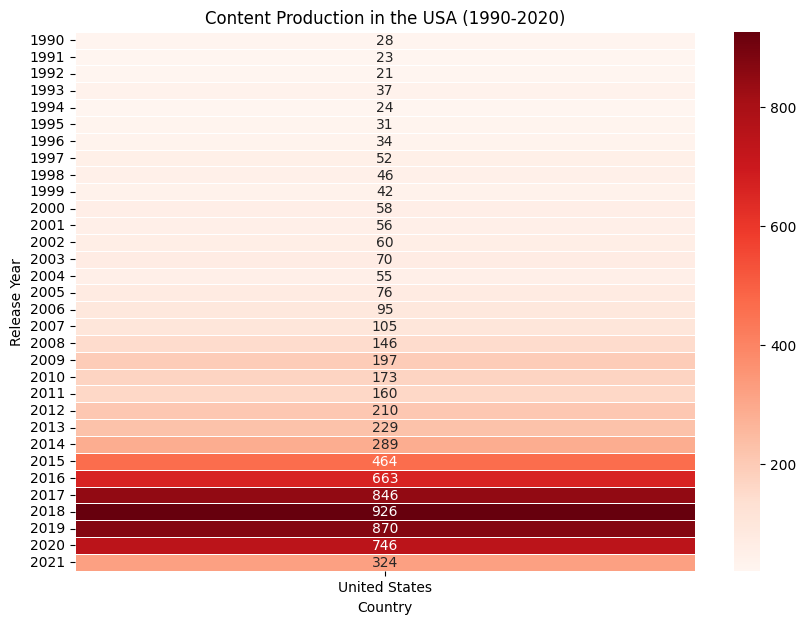

In [54]:
plt.figure(figsize=(10, 7))
filtered_usa_data = YCG_DF_pivot.loc[YCG_DF_pivot.index >= 1990, ['United States']]
sns.heatmap(filtered_usa_data, cbar=True, linewidths=0.5, cmap='Reds', annot=True, fmt='d')

plt.xlabel('Country')
plt.ylabel('Release Year')
plt.title('Content Production in the USA (1990-2020)')
plt.show()

***We can see that the production of TV content in the USA was minimal, In 2008 the content producing started increasing and we notice that it reached its peak aroud 2018!***

*lets reduce the year range to make it even clearer!*

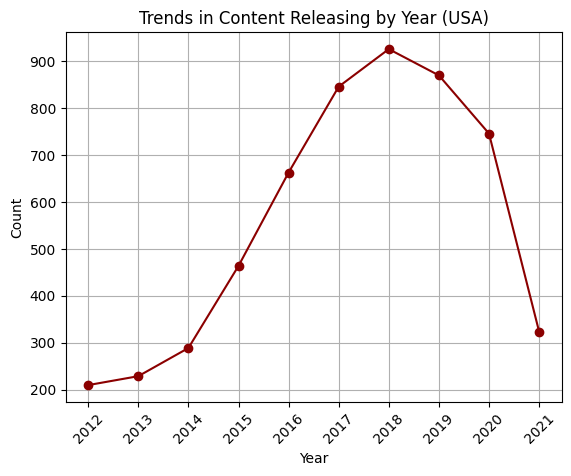

In [55]:
reset_pivot = YCG_DF_pivot.reset_index()
usa_data = reset_pivot[['release_year', 'United States']]
content = usa_data.groupby('release_year')['United States'].sum().nlargest(10).sort_index()

content.plot(kind='line', marker='o', color='darkred')
plt.title('Trends in Content Releasing by Year (USA)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(ticks=content.index, rotation=45)
plt.grid()
plt.show()


*lets plot the relationship that explains the change of the number of Netflix titles(movies/ TV Shows) released each year in each Genre*

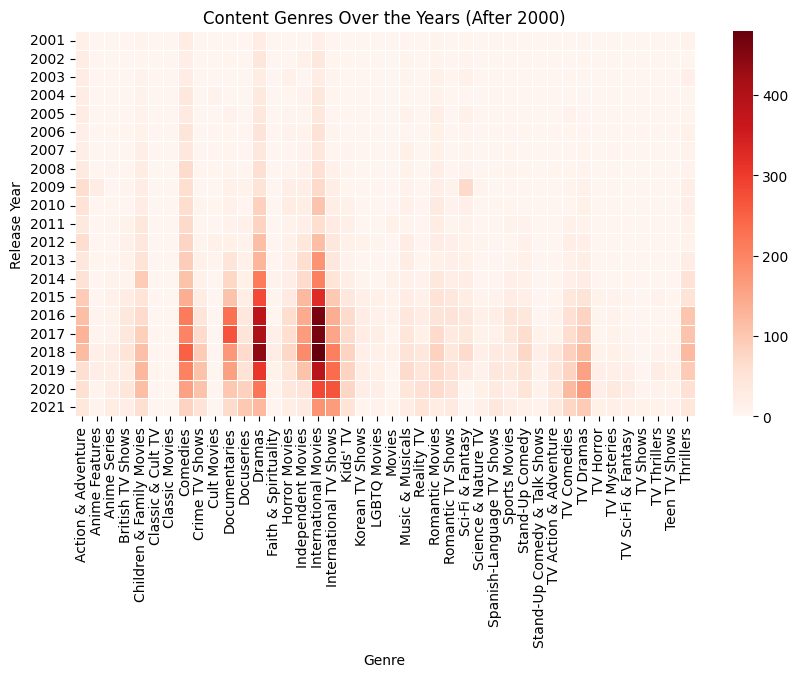

In [56]:
YCG1_DF_pivot=YCG_DF.pivot_table(values='Count', index='release_year', columns='Genre', aggfunc='sum', fill_value=0)
filtered_pivot = YCG1_DF_pivot.loc[YCG1_DF_pivot.index > 2000]
plt.figure(figsize=(10, 5))
sns.heatmap(filtered_pivot, cbar=True, linewidths=0.5, cmap='Reds')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.title('Content Genres Over the Years (After 2000)')
plt.show()

*We can tell that from 2015-2018 most movies/TV Shows released were either International movies,TV Shows or Dramas, and after that comes the Comedy.*

*Lets see what is the number of movies in each of the top 10 Genres in the United States*

<ipython-input-48-32690232a6d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds_r')


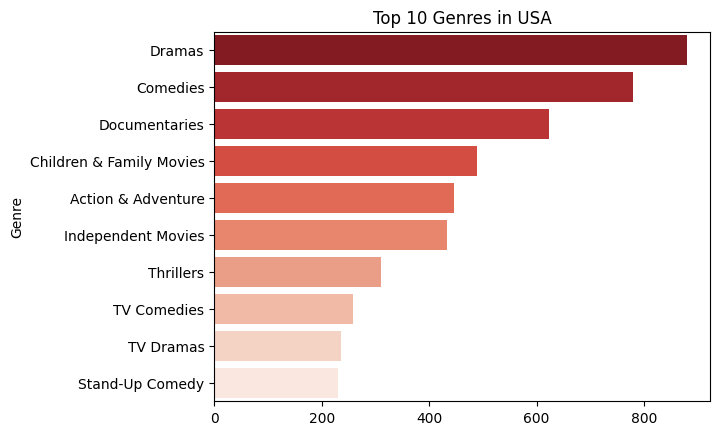

In [48]:
Country_Genre=new_df[new_df['Country']=='United States'].groupby('Genre').size().sort_values(ascending=False).head(10)
sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds_r')
plt.title('Top 10 Genres in USA')
plt.show()

*Lets see what is the number of movies/TV Shows in each of the top 7 Genres in Canada*

<ipython-input-49-a74b21e6ecec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds_r')


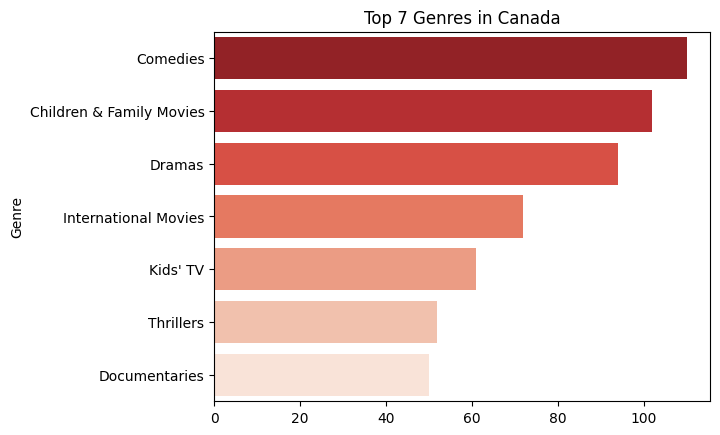

In [49]:
Country_Genre=new_df[new_df['Country']=='Canada'].groupby('Genre').size().sort_values(ascending=False).head(7)
sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds_r')
plt.title('Top 7 Genres in Canada')
plt.show()

**lets see what is the number of movies of each of the top 10 directors in the United States **

<ipython-input-57-a540a044f767>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds')


(10.0, 40.0)

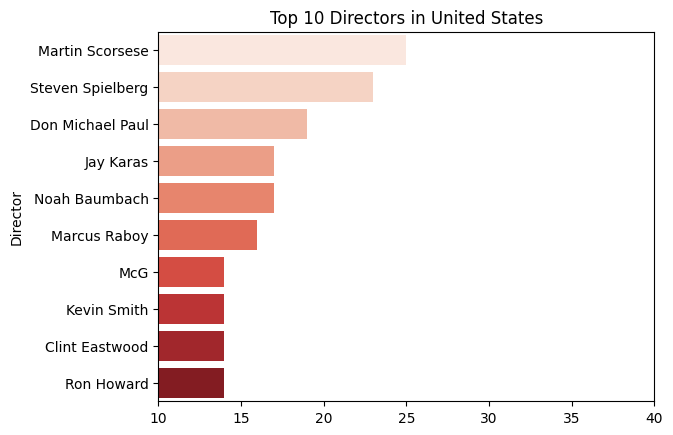

In [57]:
Country_Genre=new_df[(new_df['Country']=='United States') & (new_df['Director'] != 'Unknown')].groupby('Director').size().sort_values(ascending=False).head(10)
sns.barplot(x=Country_Genre.values, y=Country_Genre.index, palette='Reds')
plt.title('Top 10 Directors in United States')
plt.xlim(10, 40)

*Then Martin Scorsese is the Director with the most movies in United States!*